# Visualizing cross-validation behavior in scikit-learn

Para poder construir un ML Pipeline totalmente integrado con las herramientas *Scikit-Learn* es conveniente conocer todas las posibilidades disponibles a la hora de evaluar un modelo con cross-validation.

Dichas herramientas pueden ser divididas en tres grupos:
- Segun unidad de datos (registros, grupos, estratos): 
    - K: registros individuales.
    - grupos: segun grupos determinados por otra variable.
    - estratificados: Segun valores orginales/categoricos de la variable *y*.
- Con repeticion: Estos son utiles cuando hay pocos dados a los que aplicar el cross-validation.
- Segun cuantas unidades unidades de datos (registros, grupos) dejes fuera (como test dataset).

#### Reference:
- [Sklearn: Visualizing cross-validation behavior in scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)

In [6]:
from sklearn.model_selection import (
    KFold,
    RepeatedKFold,
    ShuffleSplit,
    GroupKFold,
    GroupShuffleSplit,
    StratifiedKFold,
    RepeatedStratifiedKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
    LeaveOneOut,
    LeaveOneGroupOut,
    LeavePOut,
    LeavePGroupsOut,
    TimeSeriesSplit
)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

### functions

In [37]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class (y)", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{} (num splits = {})".format(type(cv).__name__, cv.get_n_splits(X)), fontsize=15)
    return ax

### data

In [38]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))

# K Fold vs Group Fold vs Stratified Fold (suffle or not) vs TimeSeries

- **K**: A traves de todo el set de datos.
- **Groups**: A traves de grupos establecidos (Ej. Predicciones por user_name donde cada user_name tine varios registros).
- **Stratified**: A traves de valores ordinales / cardinales de la variable *y*. De esta manera, se asegura de coger un poquito de cada label a ser evaluado en cada fold.
- **TimeSeries**: A traves de ventanas temporales. 

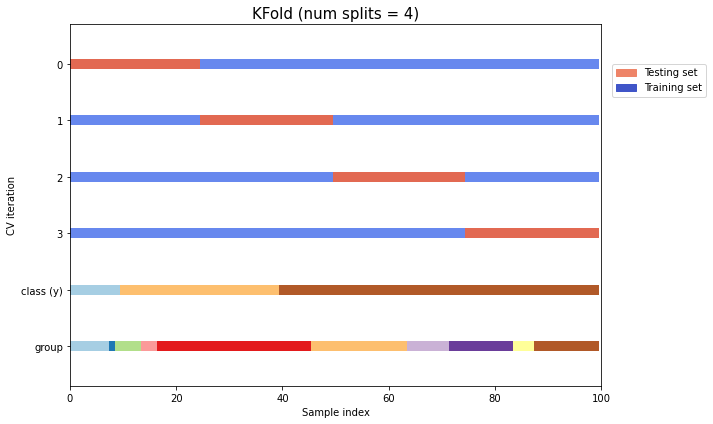

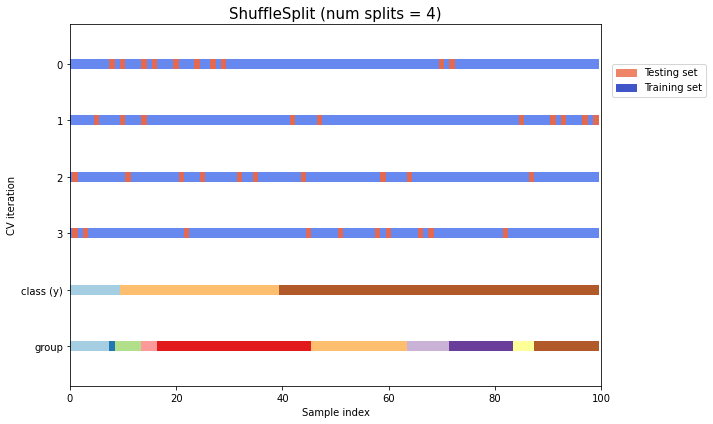

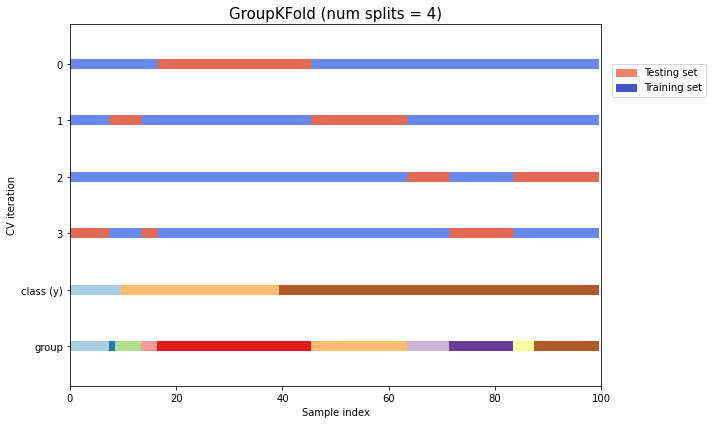

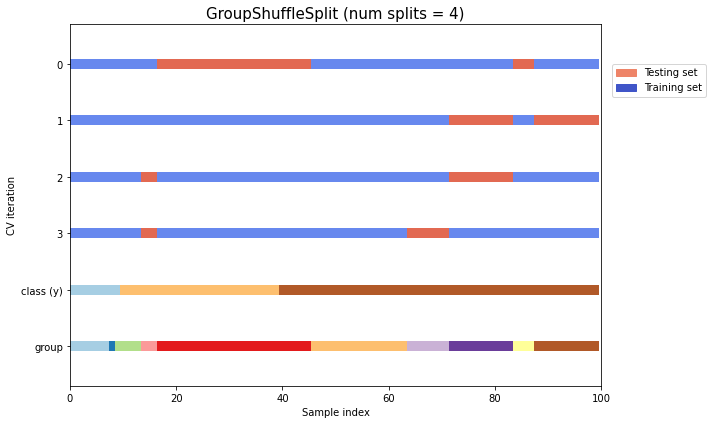

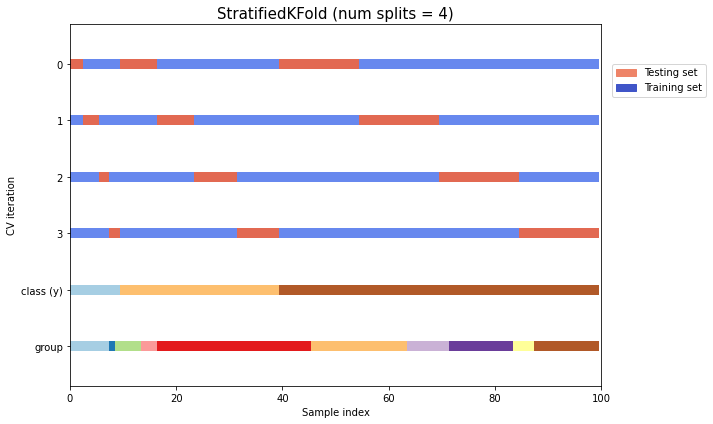

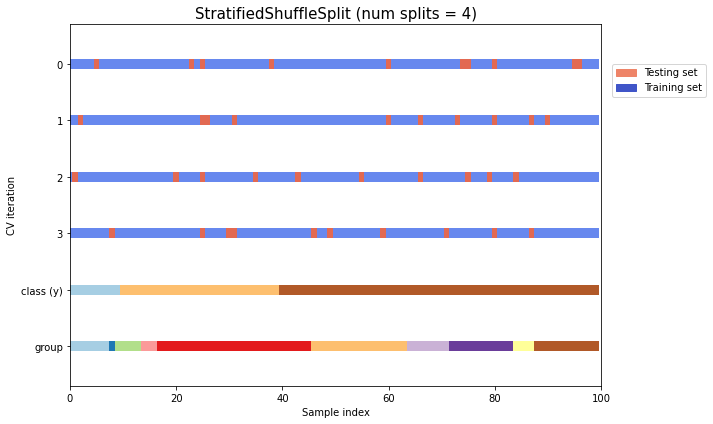

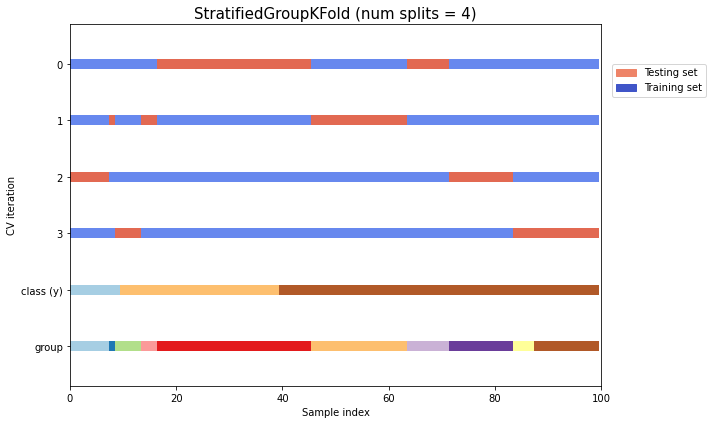

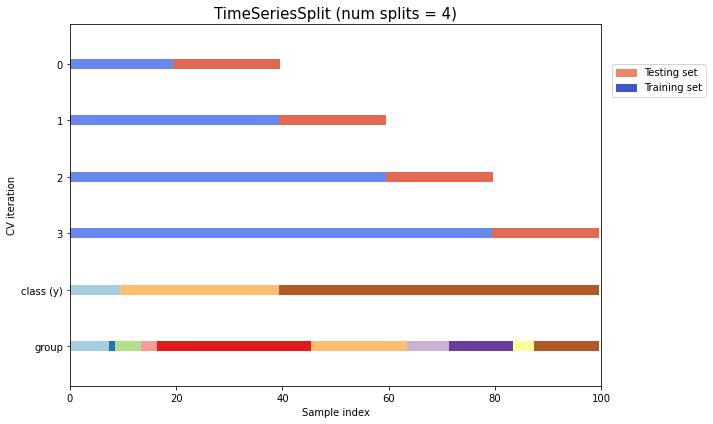

In [39]:
cvs = [
    KFold,
    ShuffleSplit,
    GroupKFold,
    GroupShuffleSplit,
    StratifiedKFold,
    StratifiedShuffleSplit,
    StratifiedGroupKFold,
    TimeSeriesSplit
]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()

# Repeated K Fold vs Repeated Stratified Fold

La opcion **repeated** se usa cuando hay pocos datos para construir un CV adecuado.

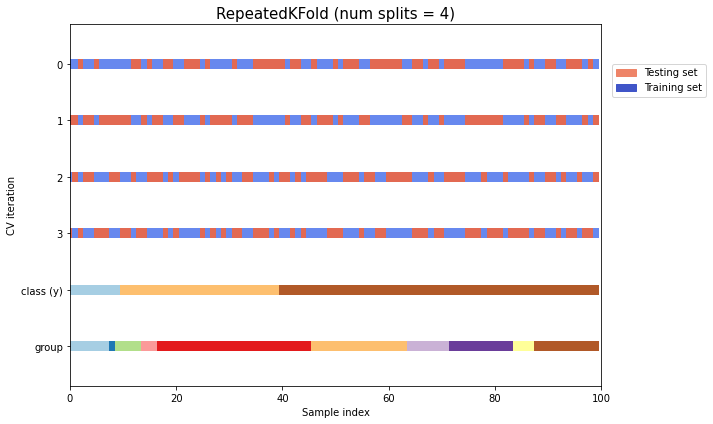

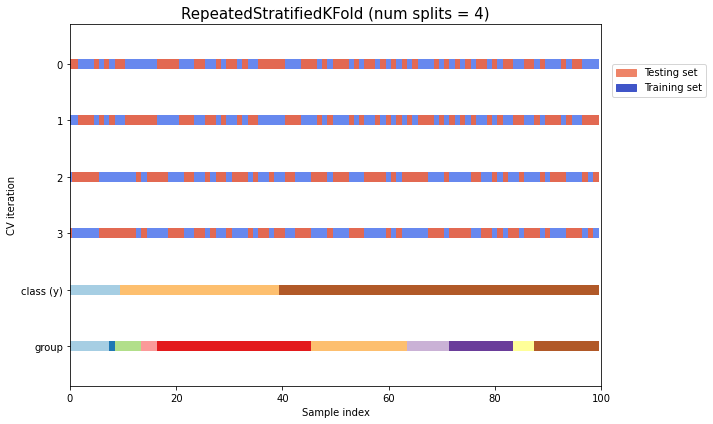

In [42]:
cvs = [
    RepeatedKFold,
    RepeatedStratifiedKFold,
]


for cv in cvs:
    this_cv = cv(n_splits=2, n_repeats = 2)
    fig, ax = plt.subplots(figsize=(12, 6))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()

# Leave Out behaivors

Estos comportamientos son construidos de diferente manera a los anteriores. En este caso, trabajando en unidades (registros) o con grupos, el test dataset de cada fold es construido con el numero de *out(s)* seleccionados mientras que el training dataset sera el resto de elementos.

- **Leave One Out**: Test dataset formado por un solo registro en cada fold.
- **Leave P Out**: Test dataset formado por *P* registros en cada fold.
- **Leave One Group Out**: Test dataset formado por un solo grupo en cada fold.
- **LeavePGroupsOut**: Test dataset formado por *P* grupos en cada fold.

In [ ]:
import numpy as np
from sklearn.model_selection import LeaveOneOut, LeavePOut, LeaveOneGroupOut, LeavePGroupsOut

### Leave Out

In [70]:
# number of records
nr = 10
# build data
X = np.ones((nr,2))
y = np.ones((nr,))
X.shape, y.shape

((10, 2), (10,))

In [71]:
## Leave One Out
loo = LeaveOneOut()
print(loo.get_n_splits(X))
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

10
TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]


In [72]:
## Leave P=1 Out
lpo = LeavePOut(1)
print(lpo.get_n_splits(X))
for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

10
TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]


In [73]:
## Leave P=2 Out
lpo = LeavePOut(2)
print(lpo.get_n_splits(X))
for train_index, test_index in lpo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

45
TRAIN: [2 3 4 5 6 7 8 9] TEST: [0 1]
TRAIN: [1 3 4 5 6 7 8 9] TEST: [0 2]
TRAIN: [1 2 4 5 6 7 8 9] TEST: [0 3]
TRAIN: [1 2 3 5 6 7 8 9] TEST: [0 4]
TRAIN: [1 2 3 4 6 7 8 9] TEST: [0 5]
TRAIN: [1 2 3 4 5 7 8 9] TEST: [0 6]
TRAIN: [1 2 3 4 5 6 8 9] TEST: [0 7]
TRAIN: [1 2 3 4 5 6 7 9] TEST: [0 8]
TRAIN: [1 2 3 4 5 6 7 8] TEST: [0 9]
TRAIN: [0 3 4 5 6 7 8 9] TEST: [1 2]
TRAIN: [0 2 4 5 6 7 8 9] TEST: [1 3]
TRAIN: [0 2 3 5 6 7 8 9] TEST: [1 4]
TRAIN: [0 2 3 4 6 7 8 9] TEST: [1 5]
TRAIN: [0 2 3 4 5 7 8 9] TEST: [1 6]
TRAIN: [0 2 3 4 5 6 8 9] TEST: [1 7]
TRAIN: [0 2 3 4 5 6 7 9] TEST: [1 8]
TRAIN: [0 2 3 4 5 6 7 8] TEST: [1 9]
TRAIN: [0 1 4 5 6 7 8 9] TEST: [2 3]
TRAIN: [0 1 3 5 6 7 8 9] TEST: [2 4]
TRAIN: [0 1 3 4 6 7 8 9] TEST: [2 5]
TRAIN: [0 1 3 4 5 7 8 9] TEST: [2 6]
TRAIN: [0 1 3 4 5 6 8 9] TEST: [2 7]
TRAIN: [0 1 3 4 5 6 7 9] TEST: [2 8]
TRAIN: [0 1 3 4 5 6 7 8] TEST: [2 9]
TRAIN: [0 1 2 5 6 7 8 9] TEST: [3 4]
TRAIN: [0 1 2 4 6 7 8 9] TEST: [3 5]
TRAIN: [0 1 2 4 5 7 8 9] TEST: [3 6

### Leave Group Out

In [ ]:
# number of records
nr = 10
# number of groups
ngroups = 3
# build data
X = np.ones((nr, 2))
y = np.ones((nr,1))
groups = np.random.randint(1,ngroups+1,nr)
groups = np.sort(groups)

In [92]:
## Leave One Group Out
logo = LeaveOneGroupOut()
print(logo.get_n_splits(X, y, groups), logo.get_n_splits(groups=groups)) # 'groups' is always required
print("Groups: ", groups)
for train_index, test_index in logo.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)

3 3
Groups:  [1 1 1 1 2 2 2 3 3 3]
TRAIN: [4 5 6 7 8 9] TEST: [0 1 2 3]
TRAIN: [0 1 2 3 7 8 9] TEST: [4 5 6]
TRAIN: [0 1 2 3 4 5 6] TEST: [7 8 9]


In [96]:
## Leave P=1 Group Out
lpgo = LeavePGroupsOut(n_groups=1)
print(lpgo.get_n_splits(X, y, groups), lpgo.get_n_splits(groups=groups))  # 'groups' is always required
print("Groups: ", groups)
for train_index, test_index in lpgo.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)

3 3
Groups:  [1 1 1 1 2 2 2 3 3 3]
TRAIN: [4 5 6 7 8 9] TEST: [0 1 2 3]
TRAIN: [0 1 2 3 7 8 9] TEST: [4 5 6]
TRAIN: [0 1 2 3 4 5 6] TEST: [7 8 9]


In [97]:
## Leave P=2 Group Out
lpgo = LeavePGroupsOut(n_groups=2)
print(lpgo.get_n_splits(X, y, groups), lpgo.get_n_splits(groups=groups))  # 'groups' is always required
print("Groups: ", groups)
for train_index, test_index in lpgo.split(X, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)

3 3
Groups:  [1 1 1 1 2 2 2 3 3 3]
TRAIN: [7 8 9] TEST: [0 1 2 3 4 5 6]
TRAIN: [4 5 6] TEST: [0 1 2 3 7 8 9]
TRAIN: [0 1 2 3] TEST: [4 5 6 7 8 9]
